In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [1]:
import os
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np

#Directories

In [2]:
source_path = '/content/gdrive/MyDrive/capstone/dataset fix'

In [3]:
train_dir = '/content/gdrive/MyDrive/capstone/dataset fix/train'
val_dir = '/content/gdrive/MyDrive/capstone/dataset fix/val'
test_dir = '/content/gdrive/MyDrive/capstone/dataset fix/test'

#Class name

In [35]:
food_name = os.listdir(train_dir)
food_name.sort()
food_name

['apple',
 'banana',
 'chicken curry',
 'chicken wings',
 'donuts',
 'french fries',
 'fried chicken',
 'fried rice',
 'hamburger',
 'hot dog',
 'ice cream',
 'omelette',
 'onion rings',
 'orange',
 'pancakes',
 'pizza',
 'rice',
 'spaghetti bolognese',
 'sushi']

#Check contains on each subdirectories

In [4]:
#Training
for i in os.listdir(train_dir):
  print(f"There are {len(os.listdir(os.path.join(train_dir, i)))} in {i}")

There are 400 in apple
There are 400 in chicken curry
There are 400 in fried chicken
There are 400 in chicken wings
There are 400 in french fries
There are 400 in donuts
There are 400 in fried rice
There are 400 in banana
There are 400 in hamburger
There are 400 in hot dog
There are 400 in ice cream
There are 400 in omelette
There are 400 in pizza
There are 400 in onion rings
There are 400 in orange
There are 400 in rice
There are 400 in sushi
There are 400 in pancakes
There are 400 in spaghetti bolognese


In [5]:
#Validation
for i in os.listdir(val_dir):
  print(f"There are {len(os.listdir(os.path.join(val_dir, i)))} in {i}")

There are 50 in apple
There are 50 in banana
There are 50 in chicken curry
There are 50 in hamburger
There are 50 in ice cream
There are 50 in fried rice
There are 50 in chicken wings
There are 50 in french fries
There are 50 in donuts
There are 50 in fried chicken
There are 50 in hot dog
There are 50 in omelette
There are 50 in onion rings
There are 50 in orange
There are 50 in pancakes
There are 50 in spaghetti bolognese
There are 50 in sushi
There are 50 in pizza
There are 50 in rice


In [6]:
#Test
for i in os.listdir(test_dir):
  print(f"There are {len(os.listdir(os.path.join(test_dir, i)))} in {i}")

There are 50 in chicken wings
There are 50 in banana
There are 50 in chicken curry
There are 50 in apple
There are 50 in donuts
There are 50 in french fries
There are 50 in fried chicken
There are 50 in ice cream
There are 50 in onion rings
There are 50 in omelette
There are 50 in orange
There are 50 in pancakes
There are 50 in hamburger
There are 50 in fried rice
There are 50 in hot dog
There are 50 in pizza
There are 50 in rice
There are 50 in sushi
There are 50 in spaghetti bolognese


#Visualize random images

In [7]:
def view_random_image(target_dir, target_class):
  full_path_class = os.path.join(target_dir, target_class)
  plt.figure()
  for i in range(1, 9):
    plt.subplot(3, 3, i)
    pick_one_image = random.choice(os.listdir(full_path_class))

    full_path_image = os.path.join(full_path_class, pick_one_image)

    img = plt.imread(full_path_image)/255.
    print(f"Image shape: {img.shape}")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

Image shape: (600, 600, 3)


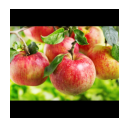

Image shape: (600, 600, 3)


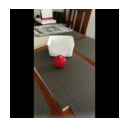

Image shape: (600, 600, 3)


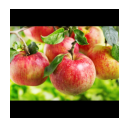

Image shape: (600, 600, 3)


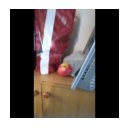

Image shape: (600, 600, 3)


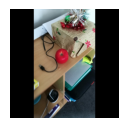

Image shape: (600, 600, 3)


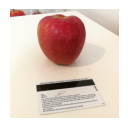

Image shape: (600, 600, 3)


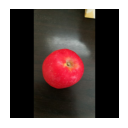

Image shape: (600, 600, 3)


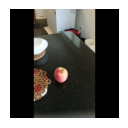

In [8]:
view_random_image(train_dir, 'apple')

Image shape: (600, 600, 3)


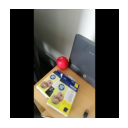

Image shape: (600, 600, 3)


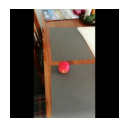

Image shape: (600, 600, 3)


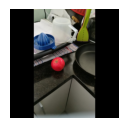

Image shape: (600, 600, 3)


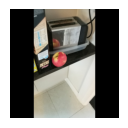

Image shape: (600, 600, 3)


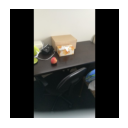

Image shape: (600, 600, 3)


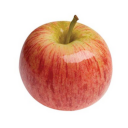

Image shape: (600, 600, 3)


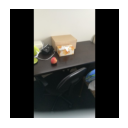

Image shape: (600, 600, 3)


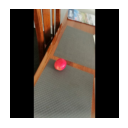

In [9]:
view_random_image(val_dir, 'apple')

Image shape: (600, 600, 3)


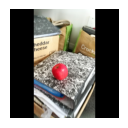

Image shape: (600, 600, 3)


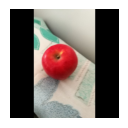

Image shape: (600, 600, 3)


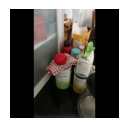

Image shape: (600, 600, 3)


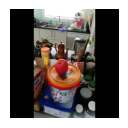

Image shape: (600, 600, 3)


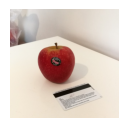

Image shape: (600, 600, 3)


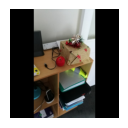

Image shape: (600, 600, 3)


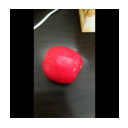

Image shape: (600, 600, 3)


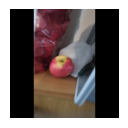

In [10]:
view_random_image(test_dir, 'apple')

#Image Augmentation

In [34]:
def train_val_generators(traindir,valdir,testdir):
    train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
    train_generator = train_datagen.flow_from_directory(directory=traindir,
                                                      batch_size=128,
                                                      target_size=(256, 256))
    validation_datagen = ImageDataGenerator(rescale=1.0/255.)
    validation_generator = validation_datagen.flow_from_directory(directory=valdir,
                                                                batch_size=16,
                                                                target_size=(256, 256))
    test_datagen = ImageDataGenerator(rescale=1.0/255.)
    test_generator = test_datagen.flow_from_directory(directory=testdir,
                                                                batch_size=16,
                                                                target_size=(256, 256))
    return train_generator, validation_generator, test_generator
train_generator, validation_generator, test_generator = train_val_generators(train_dir, val_dir, test_dir)

Found 7600 images belonging to 19 classes.
Found 950 images belonging to 19 classes.
Found 950 images belonging to 19 classes.


#Training Model

In [18]:
from keras.applications import InceptionV3
model = InceptionV3(weights='imagenet')
print(model.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 149, 149, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                      

In [19]:
InceptionV3_model = InceptionV3(input_shape=(256,256,3),weights='imagenet', include_top=False)
for layer in InceptionV3_model.layers[:249]:
   layer.trainable = False
for layer in InceptionV3_model.layers[249:]:
   layer.trainable = True
InceptionV3_last_output = InceptionV3_model.output
InceptionV3_maxpooled_output = tf.keras.layers.Flatten()(InceptionV3_last_output)
InceptionV3_x = tf.keras.layers.Dense(1024, activation='relu')(InceptionV3_maxpooled_output)
InceptionV3_x = tf.keras.layers.Dropout(0.5)(InceptionV3_x)
InceptionV3_x = tf.keras.layers.Dense(19, activation='softmax')(InceptionV3_x)
InceptionV3_x_final_model = tf.keras.Model(inputs=InceptionV3_model.input,outputs=InceptionV3_x)
InceptionV3_x_final_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
number_of_epochs = 10
callback_model = tf.keras.callbacks.ModelCheckpoint("/content/gdrive/MyDrive/capstone/checkpoint_all/model_prep.h5", monitor='accuracy', verbose=1, save_best_only=True, mode='max')
inception_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
inceptionv3_history = InceptionV3_x_final_model.fit(train_generator, epochs = number_of_epochs, validation_data = validation_generator,callbacks=[callback_model,inception_early_stopping],verbose=1)

Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 5.3230 - accuracy: 0.5532 
Epoch 1: accuracy improved from -inf to 0.55316, saving model to /content/gdrive/MyDrive/capstone/checkpoint_all/model_prep.h5
60/60 [==============================] - 2375s 39s/step - loss: 5.3230 - accuracy: 0.5532 - val_loss: 1.5509 - val_accuracy: 0.7116
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 0.7223 - accuracy: 0.7975 
Epoch 2: accuracy improved from 0.55316 to 0.79750, saving model to /content/gdrive/MyDrive/capstone/checkpoint_all/model_prep.h5
60/60 [==============================] - 2371s 39s/step - loss: 0.7223 - accuracy: 0.7975 - val_loss: 0.9913 - val_accuracy: 0.8116
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 0.5369 - accuracy: 0.8493 
Epoch 3: accuracy improved from 0.79750 to 0.84934, saving model to /content/gdrive/MyDrive/capstone/checkpoint_all/model_prep.h5
60/60 [==============================] - 2335s 39s/step - loss: 

#Load Model

In [11]:
model = tf.keras.models.load_model("/content/gdrive/MyDrive/capstone/checkpoint_all/model_prep.h5")

#Import model to JSON

In [27]:
saved_model_path = "./tmp/model_prep.h5"

model.save(saved_model_path)

In [30]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2023-05-23 01:05:52.454295: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#Import model to TFLITE

In [31]:
tf.saved_model.save(model, "/content/gdrive/MyDrive/capstone/tflite")

In [32]:
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULTmode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [33]:
converter = tf.lite.TFLiteConverter.from_saved_model("/content/gdrive/MyDrive/capstone/tflite")

# Set the optimzations
converter.optimizations = [tf.lite.OpsSet.TFLITE_BUILTINS,
                           tf.lite.OpsSet.SELECT_TF_OPS]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [36]:
import pathlib

tflite_model_file = pathlib.Path('/content/gdrive/MyDrive/capstone/tflite/model.tflite')
tflite_model_file.write_bytes(tflite_model)

389198832

#Evaluate model

In [37]:
model.evaluate(test_generator)

60/60 [==============================] - 217s 4s/step - loss: 0.7837 - accuracy: 0.8684


[0.7837243676185608, 0.8684210777282715]

#Predict model

In [43]:
from tensorflow.keras.utils import load_img, img_to_array

def img_test(path):
  img = load_img(path, target_size=(256, 256))
  x = img_to_array(img)
  x = tf.expand_dims(x, axis=0)/255.
  classes = model.predict(x, batch_size=128).argmax(axis=1)
  #print(path)
  return classes

In [46]:
acc = []
false = []
correct = []
for count, name in enumerate(food_name):
   path = os.path.join(test_dir, name)
   print(f"Folder name : {path}")
   path_value = os.listdir(path)
   path_value.sort()
   false_acc = 0
   correct_acc = 0
   pred_list = []
   for i in path_value:
    file = os.path.join(path, i)
    x = img_test(file)
    pred = x[0]
    pred_list.append(pred)
    if pred != count:
      false_acc += 1
    else:
      correct_acc += 1
   print(f"There're {correct_acc} correct prediction from total of {len(path_value)} images.")
   print(f"Accuracy : {correct_acc/len(path_value)}")
   false.append(false_acc)
   correct.append(correct_acc)
   acc.append(correct_acc/len(path_value))

Folder name : /content/gdrive/MyDrive/capstone/dataset fix/test/apple
1/1 [==============================] - 0s 214ms/step
There're 50 correct prediction from total of 50 images.
Accuracy : 1.0
Folder name : /content/gdrive/MyDrive/capstone/dataset fix/test/banana
1/1 [==============================] - 0s 216ms/step
There're 45 correct prediction from total of 50 images.
Accuracy : 0.9
Folder name : /content/gdrive/MyDrive/capstone/dataset fix/test/chicken curry
1/1 [==============================] - 0s 218ms/step
There're 40 correct prediction from total of 50 images.
Accuracy : 0.8
Folder name : /content/gdrive/MyDrive/capstone/dataset fix/test/chicken wings
1/1 [==============================] - 0s 390ms/step
There're 41 correct prediction from total of 50 images.
Accuracy : 0.82
Folder name : /content/gdrive/MyDrive/capstone/dataset fix/test/donuts
1/1 [==============================] - 0s 205ms/step
There're 45 correct prediction from total of 50 images.
Accuracy : 0.9
Folder name

In [48]:
for count, name in enumerate(food_name):
  print(f"Food name : {name}")
  print(f"There are {correct[count]} images out of {len(os.listdir(os.path.join(test_dir, name)))} images.")
  print(f"Accuracy :  {acc[count]} \n")

print(f"Mean accuracy : {np.sum(acc)/19}")

Food name : apple
There are 50 images out of 50 images.
Accuracy :  1.0 

Food name : banana
There are 45 images out of 50 images.
Accuracy :  0.9 

Food name : chicken curry
There are 40 images out of 50 images.
Accuracy :  0.8 

Food name : chicken wings
There are 41 images out of 50 images.
Accuracy :  0.82 

Food name : donuts
There are 45 images out of 50 images.
Accuracy :  0.9 

Food name : french fries
There are 45 images out of 50 images.
Accuracy :  0.9 

Food name : fried chicken
There are 41 images out of 50 images.
Accuracy :  0.82 

Food name : fried rice
There are 46 images out of 50 images.
Accuracy :  0.92 

Food name : hamburger
There are 37 images out of 50 images.
Accuracy :  0.74 

Food name : hot dog
There are 46 images out of 50 images.
Accuracy :  0.92 

Food name : ice cream
There are 48 images out of 50 images.
Accuracy :  0.96 

Food name : omelette
There are 39 images out of 50 images.
Accuracy :  0.78 

Food name : onion rings
There are 48 images out of 50 